In [1]:
import pandas as pd

# Assuming the current working directory is at the root where 'data' folder exists
file_path = 'data/filled_df_filtered_with_duplicates.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
print(df.head())


             timestamp     low    high    open   close      volume  \
0  2016-01-01 00:00:00  430.35  431.82  430.35  430.61  160.179593   
1  2016-01-01 01:00:00  430.00  430.98  430.59  430.78   92.132315   
2  2016-01-01 02:00:00  430.50  430.89  430.80  430.62   93.024327   
3  2016-01-01 03:00:00  430.31  432.84  430.62  432.84  103.811532   
4  2016-01-01 04:00:00  432.72  437.15  432.74  436.12  363.875951   

       sma_30        rsi      macd  dia_open  ...  value  classification  id  \
0  427.471667  56.564580  1.190551   147.317  ...    NaN             NaN NaN   
1  427.600333  57.507715  1.174780   147.317  ...    NaN             NaN NaN   
2  427.682000  56.182907  1.136271   147.317  ...    NaN             NaN NaN   
3  427.869000  67.989018  1.270246   147.317  ...    NaN             NaN NaN   
4  428.126000  78.064719  1.622389   147.317  ...    NaN             NaN NaN   

   title  url  sentiment_score  sentiment_interpretation  author  \
0    NaN  NaN              NaN

/var/folders/jt/f0dtwp_x2w1fvk06tzwm2p200000gn/T/ipykernel_75898/1794267111.py:5: DtypeWarning: Columns (48,50,51,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
# Check missing values again

In [3]:
import pandas as pd

# Assuming you have loaded your DataFrame as 'df'
# If you haven't loaded it, you should load it from your CSV file or other data source here

# Checking for missing values per column
missing_values = df.isnull().sum()

# Displaying the number of missing values per column
print("Missing values per column:")
print(missing_values)

# For a more detailed percentage breakdown of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Missing values per column:
timestamp                                                 0
low                                                       0
high                                                      0
open                                                      0
close                                                     0
volume                                                    0
sma_30                                                    0
rsi                                                       0
macd                                                      0
dia_open                                                  0
dia_high                                                  0
dia_low                                                   0
dia_close                                                 0
dia_volume                                                0
gld_open                                                  0
gld_high                                                  0
gld_low      

In [4]:
# Statistics

In [5]:
import pandas as pd
import os

# Create a directory for the report
report_dir = "reporting/descriptive_stats"
os.makedirs(report_dir, exist_ok=True)

# Function to convert DataFrame summary to LaTeX format and write to a file
def save_summary_to_latex(df_summary, title, file_path):
    latex_content = "\\section*{" + title + "}\n" + df_summary.to_latex()
    with open(file_path, 'a') as f:  # Use 'a' to append to the file
        f.write(latex_content + "\n\n")

report_path = os.path.join(report_dir, 'dataframe_summary_report.tex')

# Ensure the report file is empty before starting
open(report_path, 'w').close()

# Data types of each column
dtypes_df = pd.DataFrame(df.dtypes, columns=['DataType'])
save_summary_to_latex(dtypes_df, "Data Types of Each Column", report_path)

# Statistical summary of numeric columns
numeric_summary = df.describe()
save_summary_to_latex(numeric_summary, "Statistical Summary of Numeric Columns", report_path)

# Statistics for non-numeric data types
non_numeric_summary = df.describe(include='object')
save_summary_to_latex(non_numeric_summary, "Statistics for Non-Numeric Data Types", report_path)

# Combined summary for all columns
combined_summary = df.describe(include='all')
save_summary_to_latex(combined_summary, "Combined Summary for All Columns", report_path)

print(f"DataFrame summaries saved to {report_path}")


DataFrame summaries saved to reporting/descriptive_stats/dataframe_summary_report.tex


In [6]:
# Visualizations

In [7]:
# Distribution of Key Financial Metrics
# We'll start by plotting the distributions of 'low', 'high', 'open', 'close', and 'volume' to understand the data's spread.

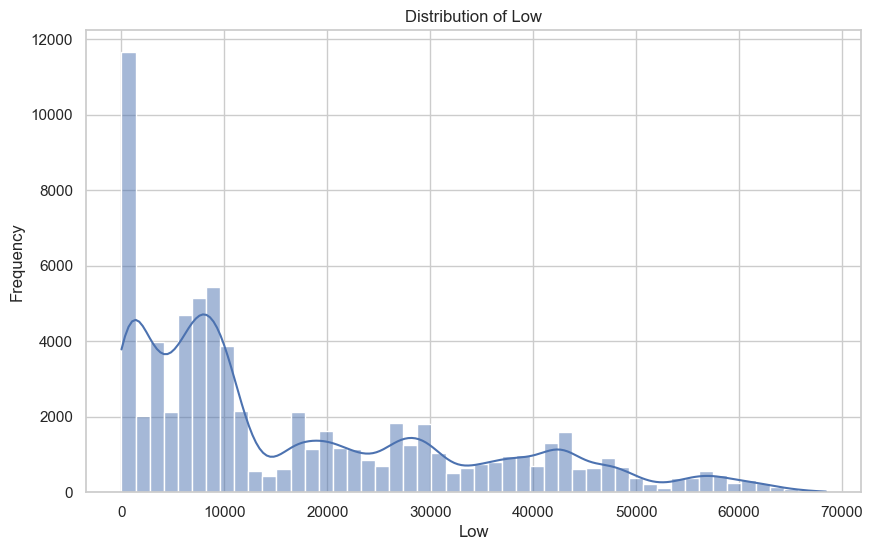

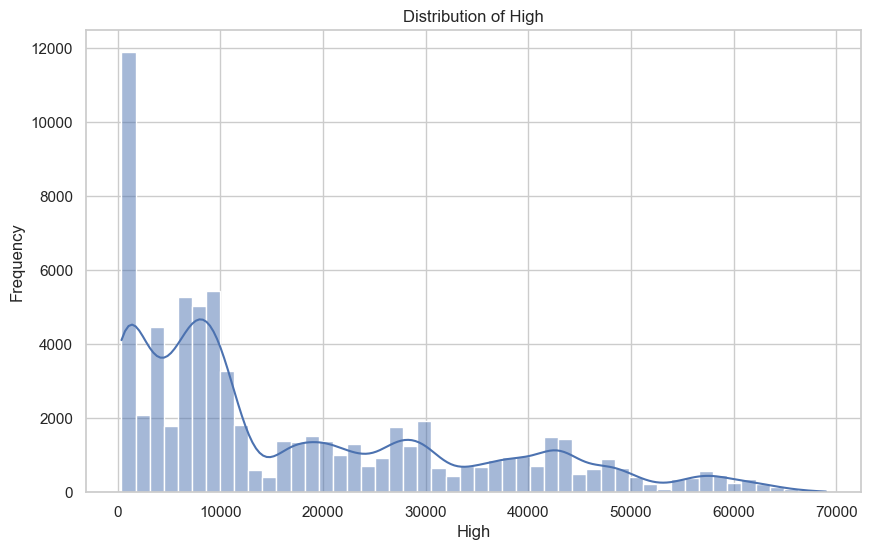

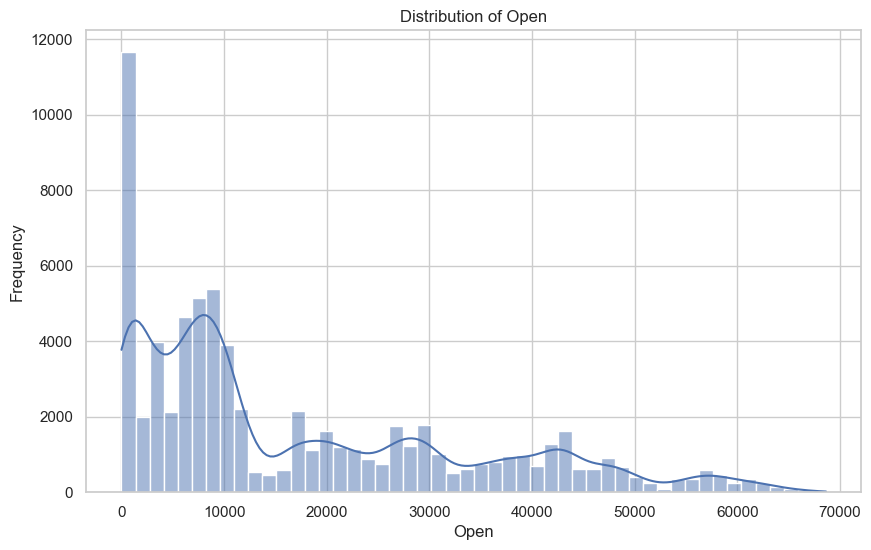

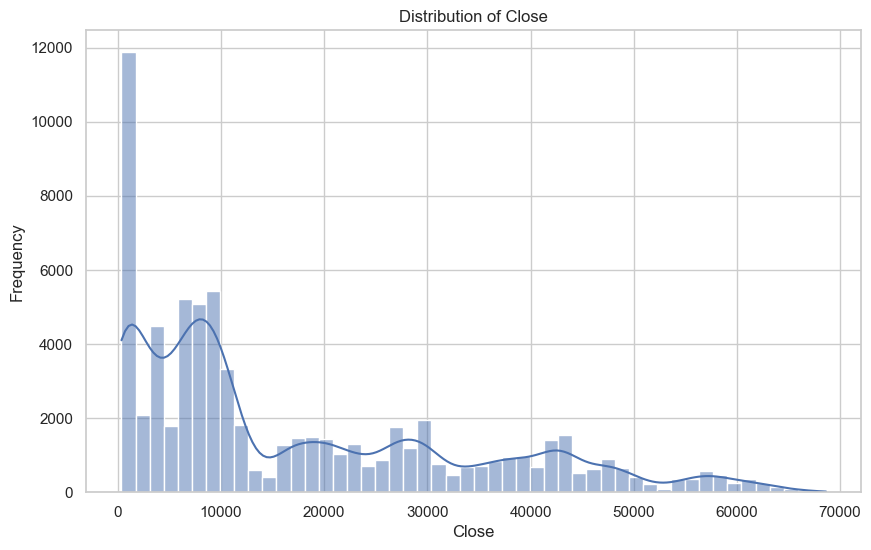

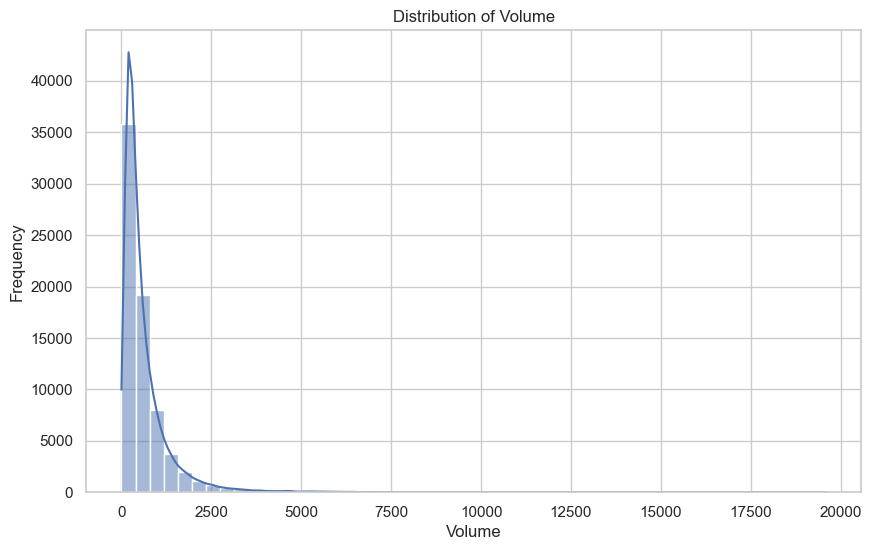

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

metrics = ['low', 'high', 'open', 'close', 'volume']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=metric, bins=50, kde=True)
    plt.title(f'Distribution of {metric.capitalize()}')
    plt.xlabel(metric.capitalize())
    plt.ylabel('Frequency')
    plt.show()


In [9]:
# Time Series Analysis
# Next, we'll plot a few key metrics over time.

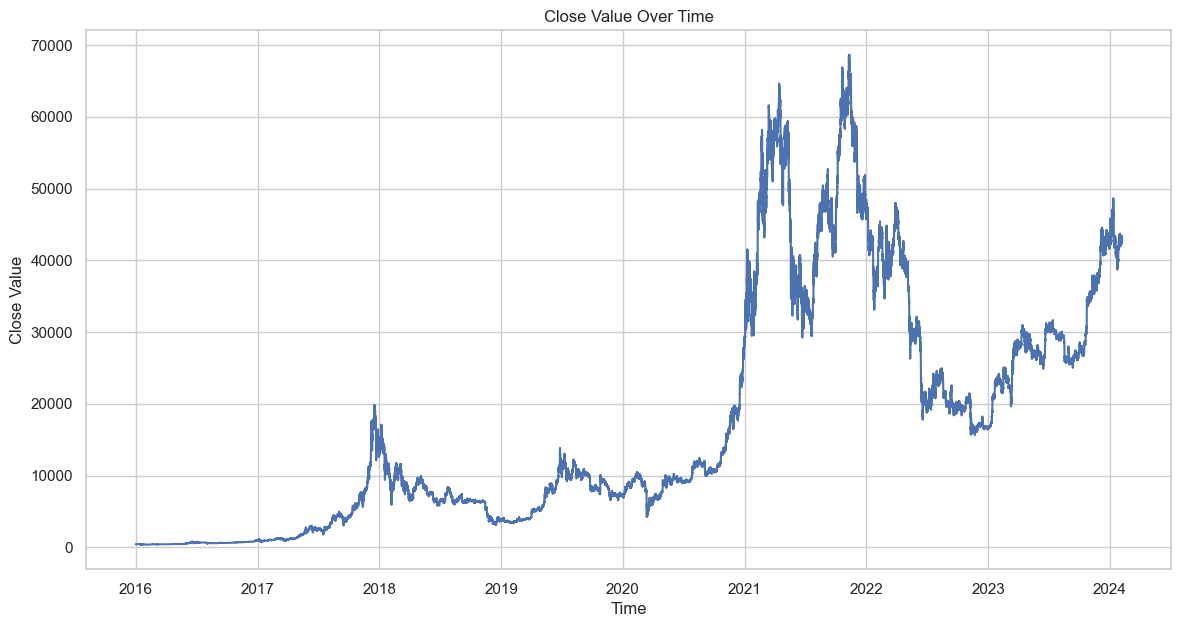

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plotting 'close' value over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='close', data=df)
plt.title('Close Value Over Time')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.show()


In [11]:
# Correlation Heatmap
# A heatmap can visually represent the correlation between different features in your dataset.

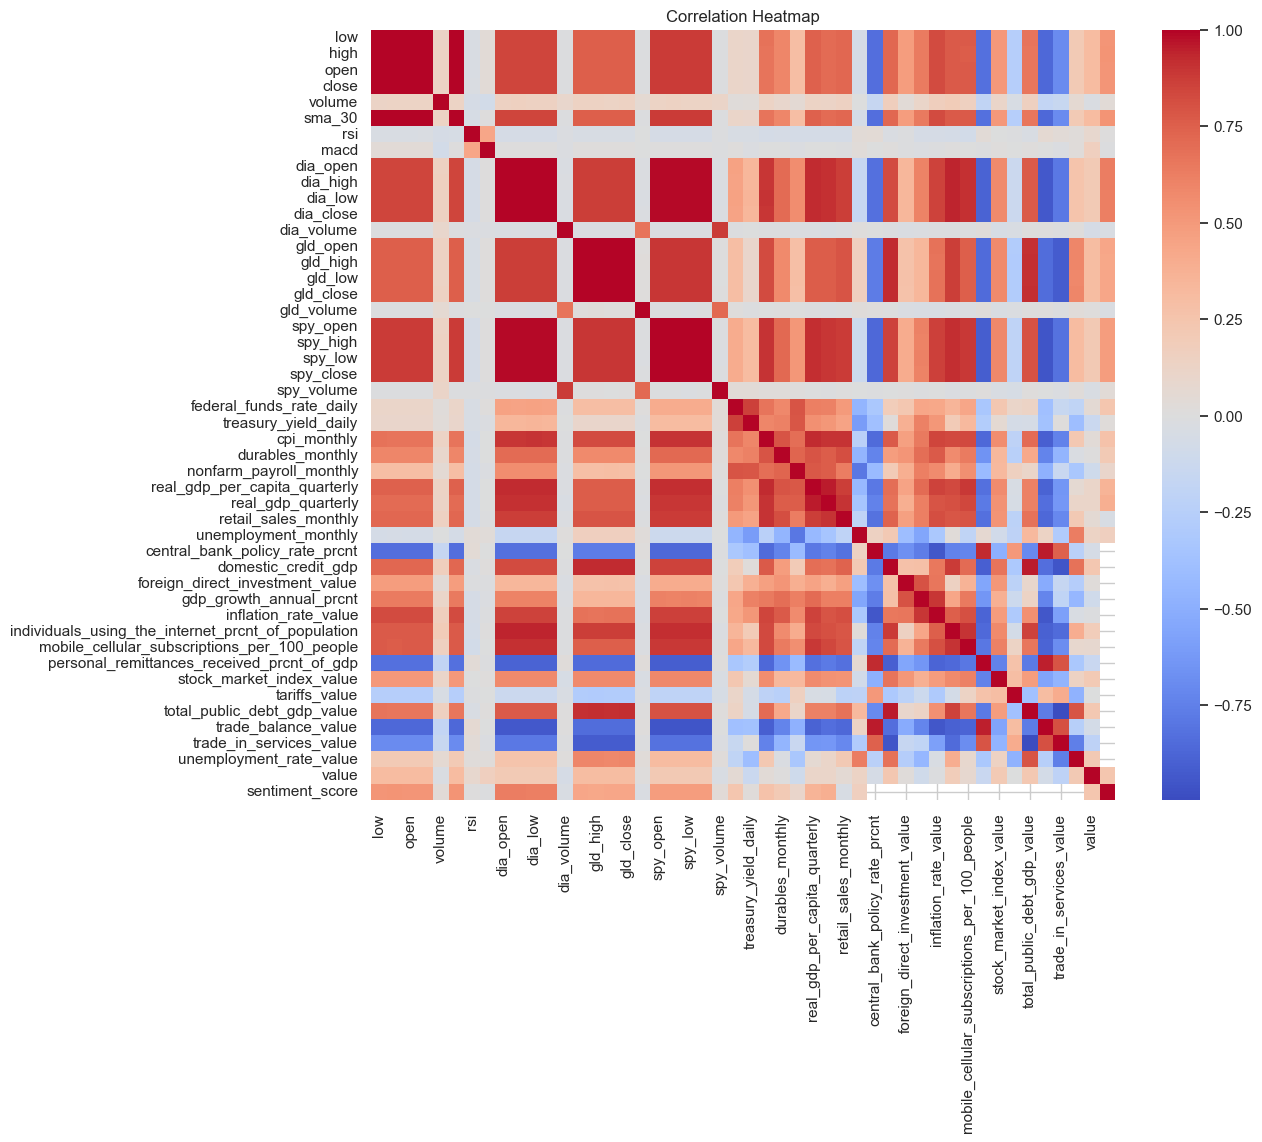

Figure saved as images/correlation_heatmap.png


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Assuming 'df' is your DataFrame
# Ensure the /images folder exists
images_folder = "images"
os.makedirs(images_folder, exist_ok=True)

# Your numerical features list remains the same
numerical_features = [
    'low', 'high', 'open', 'close', 'volume', 'sma_30', 'rsi', 'macd',
    'dia_open', 'dia_high', 'dia_low', 'dia_close', 'dia_volume',
    'gld_open', 'gld_high', 'gld_low', 'gld_close', 'gld_volume',
    'spy_open', 'spy_high', 'spy_low', 'spy_close', 'spy_volume',
    'federal_funds_rate_daily', 'treasury_yield_daily', 'cpi_monthly',
    'durables_monthly', 'nonfarm_payroll_monthly', 'real_gdp_per_capita_quarterly',
    'real_gdp_quarterly', 'retail_sales_monthly', 'unemployment_monthly',
    'central_bank_policy_rate_prcnt', 'domestic_credit_gdp', 'foreign_direct_investment_value',
    'gdp_growth_annual_prcnt', 'inflation_rate_value', 'individuals_using_the_internet_prcnt_of_population',
    'mobile_cellular_subscriptions_per_100_people', 'personal_remittances_received_prcnt_of_gdp',
    'stock_market_index_value', 'tariffs_value', 'total_public_debt_gdp_value',
    'trade_balance_value', 'trade_in_services_value', 'unemployment_rate_value',
    'value', 'sentiment_score'
]

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the correlation heatmap and save the figure
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
# Save the figure to the /images folder
figure_filename = os.path.join(images_folder, 'correlation_heatmap.png')
plt.savefig(figure_filename, dpi=300, bbox_inches='tight')
plt.show()
plt.close() # Close the figure to free memory, especially useful when running in limited environments

print(f"Figure saved as {figure_filename}")


In [ ]:
# Sentiment Score Analysis
# Finally, let's explore the sentiment score distribution and its impact over time.

In [ ]:
# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment_score', bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Sentiment score over time (assuming sentiment_score is tied to specific dates)
# Make sure to handle NaN values appropriately, e.g., by filtering or imputation
df['timestamp_news'] = pd.to_datetime(df['timestamp_news'])
plt.figure(figsize=(14, 7))
sns.scatterplot(x='timestamp_news', y='sentiment_score', data=df)
plt.title('Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()


In [ ]:
# First, filter the DataFrame to include only rows where 'timestamp_news' is not null
df_filtered = df.dropna(subset=['timestamp_news'])

# Convert 'timestamp_news' to datetime
df_filtered['timestamp_news'] = pd.to_datetime(df_filtered['timestamp_news'])

# Extract year and month from 'timestamp_news'
df_filtered['year'] = df_filtered['timestamp_news'].dt.year
df_filtered['month'] = df_filtered['timestamp_news'].dt.month
df_filtered['day'] = df_filtered['timestamp_news'].dt.day

# Filter for 2022 and 2023
df_filtered_2022_2023 = df_filtered[df_filtered['year'].isin([2022, 2023])]

# Group by year, month, and day to count the number of articles published each day
articles_per_day = df_filtered_2022_2023.groupby(['year', 'month', 'day']).size().reset_index(name='articles_count')

articles_per_day.head()


In [ ]:
# Fear and Greed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'timestamp' to datetime for easier plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtering to include only rows with non-null 'value' and 'classification'
df_filtered = df.dropna(subset=['value', 'classification'])

# Plotting 'value' over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='value', data=df_filtered)
plt.title('Value Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plotting the distribution of 'classification' over time
# First, ensure 'classification' is of type category for better plotting performance
df_filtered['classification'] = df_filtered['classification'].astype('category')

# Plot count of classifications over time
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='classification')
plt.title('Distribution of Classification Categories')
plt.xlabel('Classification')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


In [ ]:
# Fear and greed (colorized)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'timestamp' is in datetime format and sort the DataFrame by it
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_sorted = df.sort_values('timestamp')

# Use lineplot to connect all points
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='value', data=df_sorted, sort=False, estimator=None, lw=1, color='gray')

# Overlay a scatterplot to color-code each day based on 'classification'
sns.scatterplot(x='timestamp', y='value', hue='classification', data=df_sorted, palette='tab10', s=50, edgecolor='none')

plt.title('Daily Value with Classification Coloring')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'timestamp' is in datetime format and sort the DataFrame by it
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_sorted = df.sort_values('timestamp')

# Adjust the palette to include all classifications present in your dataset
palette = {
    "Fear": "#ff2e63",
    "Greed": "#08d9d6",
    "Neutral": "#f7f7f7",
    "Uncertain": "#ffe2e2",
    "Confident": "#32e0c4",
    "Extreme Greed": "#00ff00",  # Example color for 'Extreme Greed'
    "Extreme Fear": "#0000ff"   # Example color for 'Extreme Fear'
}

# Creating the plot
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Use lineplot to connect all points, with a neutral color for the line
sns.lineplot(x='timestamp', y='value', data=df_sorted, sort=False, estimator=None, lw=1, color='lightgray', alpha=0.8)

# Overlay a scatterplot to color-code each day based on 'classification'
sns.scatterplot(x='timestamp', y='value', hue='classification', data=df_sorted, palette=palette, s=60, edgecolor='black', linewidth=0.3)

plt.title('Daily Value with Classification Coloring', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, edgecolor="black")
sns.despine(trim=True)
plt.tight_layout()
plt.show()
